In [1]:
%matplotlib inline

Make sure you have downloaded the model weights to your computer. Refer to the README.md file for more instructions.

In [ ]:
DETECTOR = 'models/md_v1000.0.0-redwood.pt'
CLASSIFIER = 'models/awc-135-v1.pth'
LABELS = 'labels.txt'

# Get all images from path

In [26]:
from awc_helpers import DetectAndClassify,get_all_image_paths,visualize_detections

Note: make sure to put your own path to the image folder. I am using my local image folder for this demonstration

In [5]:
img_paths = get_all_image_paths(r"C:\Users\Quan.Tran\quan\testing-awc-inference\images\Example Images of Species")

In [6]:
img_paths[:5]

['C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater.JPG',
 'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater2.JPG',
 'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
 'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater4.JPG',
 'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Accipiter fasciatus - Brown Goshawk.JPG']

In [7]:
len(img_paths)

514

# Prepare the prediction pipeline

In [8]:
with open('labels.txt','r',encoding='utf-8-sig') as f:
    labels = [line.strip() for line in f]

In [27]:
len(labels)

135

In [28]:
labels[:5] # the first 5 labels (out of 135)

['Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
 'Aepyprymnus rufescens | Rufus Bettong',
 'Agamidae sp | Dragon sp',
 'Alectura lathami | Australian Brush-turkey',
 'Amphibia sp | Frog sp']

In [10]:
pipeline = DetectAndClassify(detector_path = DETECTOR,
                             classifier_path = CLASSIFIER,
                             label_names=labels,
                             detection_threshold=0.1, # any detection from MegaDetector model that is less than this, won't be included in the result
                             clas_threshold=0.5 # any classification from AWC135 model that is less than this, won't be included in the result
                            )
                             

PyTorch reports 1 available CUDA devices
GPU available: True


C:\Users\Quan.Tran\AppData\Local\miniforge3\envs\webinar\Lib\site-packages\yolov5\utils\general.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


Loading PT detector with compatibility mode classic
Loaded image size 1280 from model metadata
Using model stride: 64
PTDetector using device cuda:0
Forward-compatibility issue detected, patching


Fusing layers... 
Fusing layers... 
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
	GPU Device: NVIDIA GeForce RTX 5070
	GPU Device: NVIDIA GeForce RTX 5070
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes


# Predict and visualize

In [11]:
%matplotlib inline

In [12]:
img_paths[0]

'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater.JPG'

In [13]:
results = pipeline.predict(img_paths[0])

In [14]:
results

[('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater.JPG',
  0.968,
  (0.5444, 0.5833, 0.1606, 0.1458),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9831)]

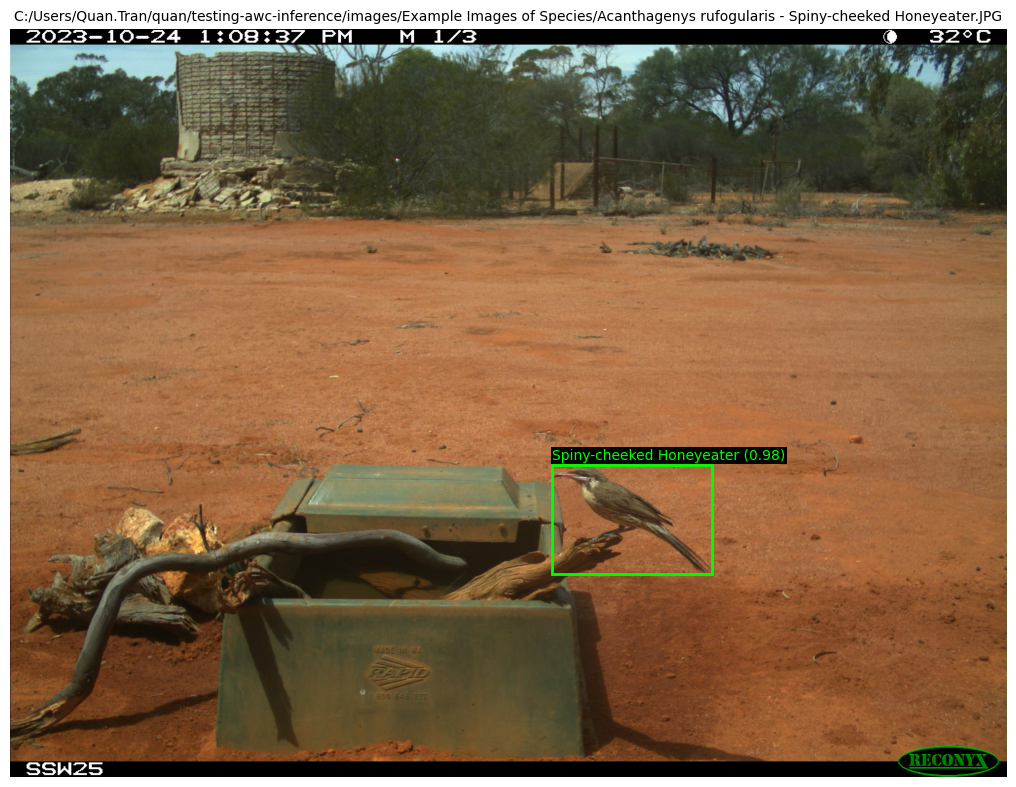

In [15]:
visualize_detections(results)

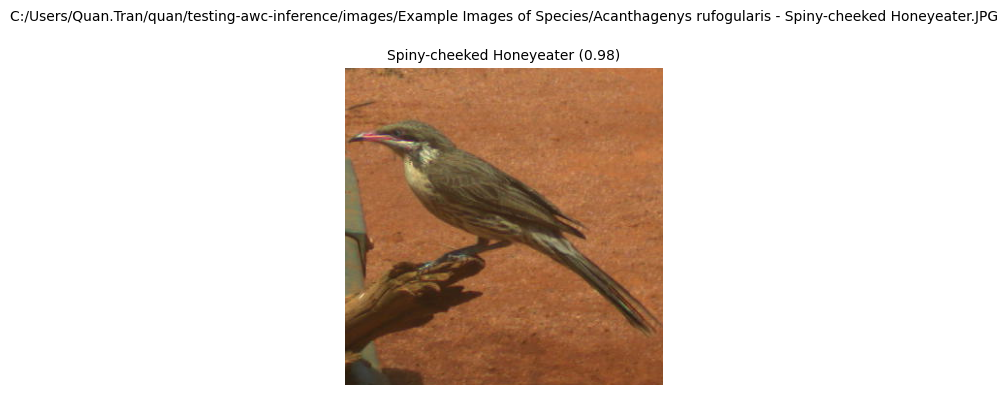

In [16]:
visualize_detections(results,plot_type='crop')

In [15]:
img_paths[2]

'C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\Example Images of Species\\Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG'

C:\Users\Quan.Tran\quan\testing-awc-inference\images\Example Images of Species\Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG


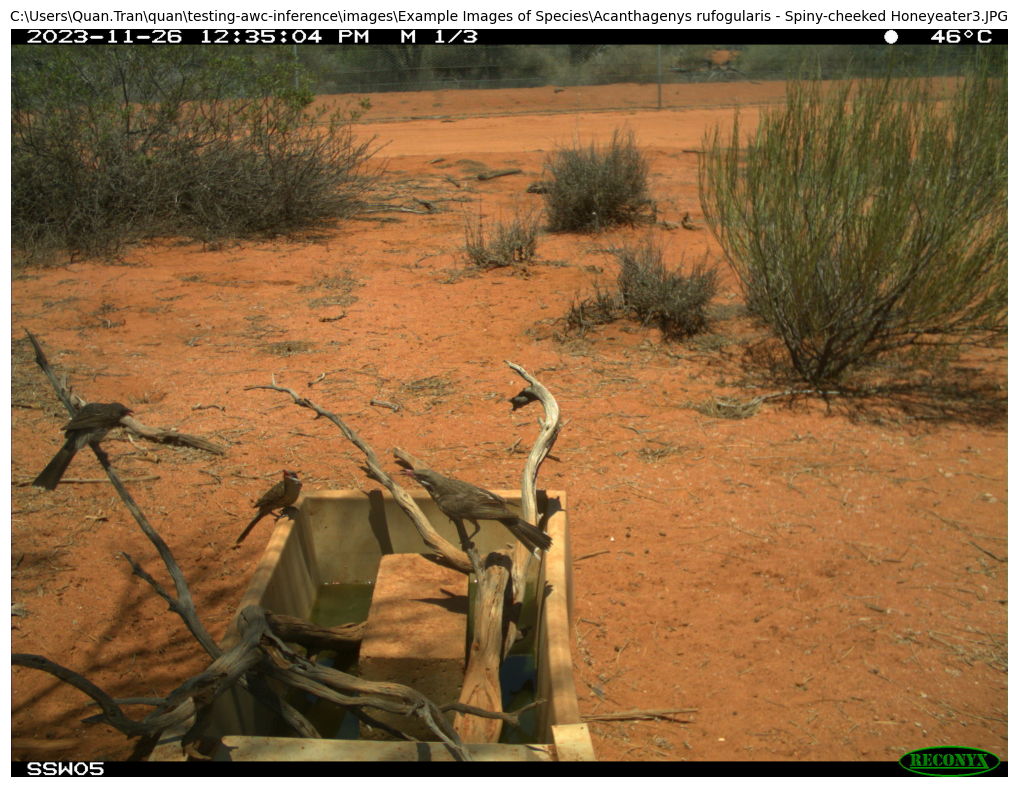

In [39]:
# little trick to show the image without the bounding box info: put Nones for bbox coordinates and bbox confidence
visualize_detections((img_paths[2],None,None))

In [17]:
results = pipeline.predict(img_paths[2])
results

[('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
  0.914,
  (0.0195, 0.4986, 0.104, 0.1197),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9938),
 ('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
  0.915,
  (0.2231, 0.5885, 0.0693, 0.1035),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9927),
 ('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
  0.945,
  (0.3891, 0.5865, 0.1557, 0.1184),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.997)]

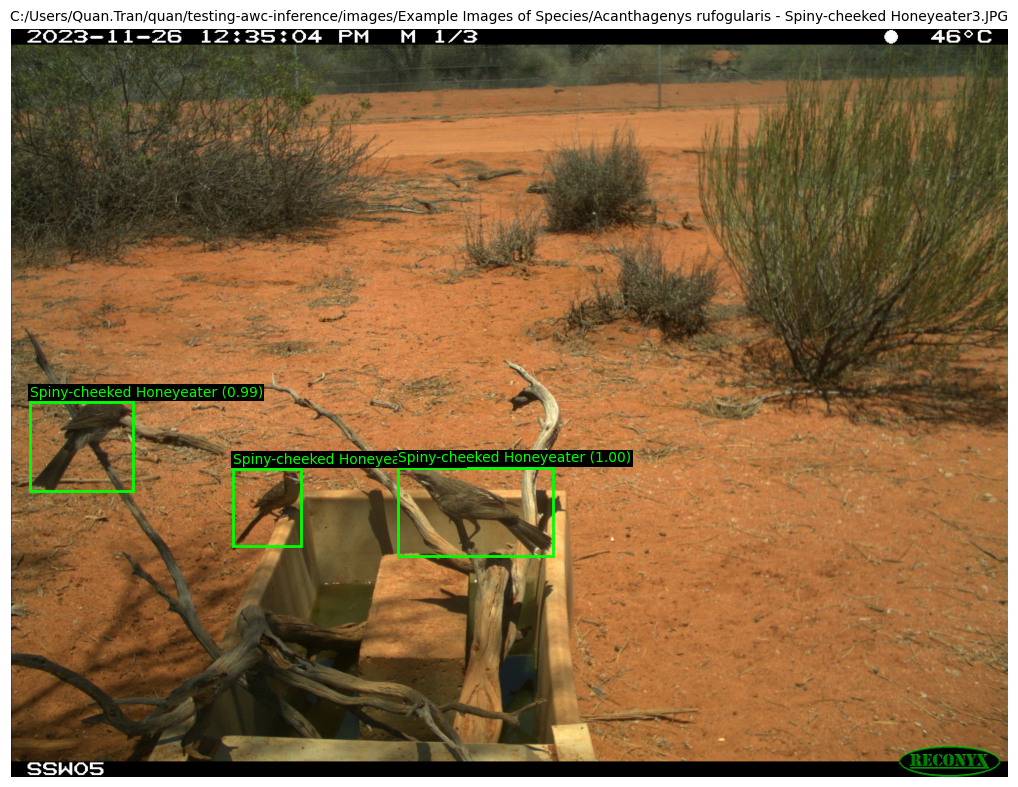

In [18]:
visualize_detections(results,plot_type='full')

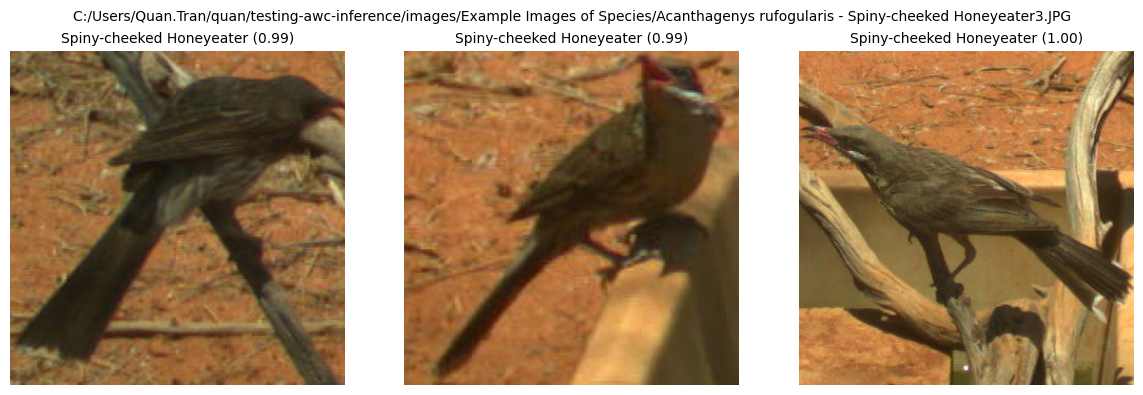

In [19]:
visualize_detections(results,plot_type='crop')

# Other cases

This is an image with no animals

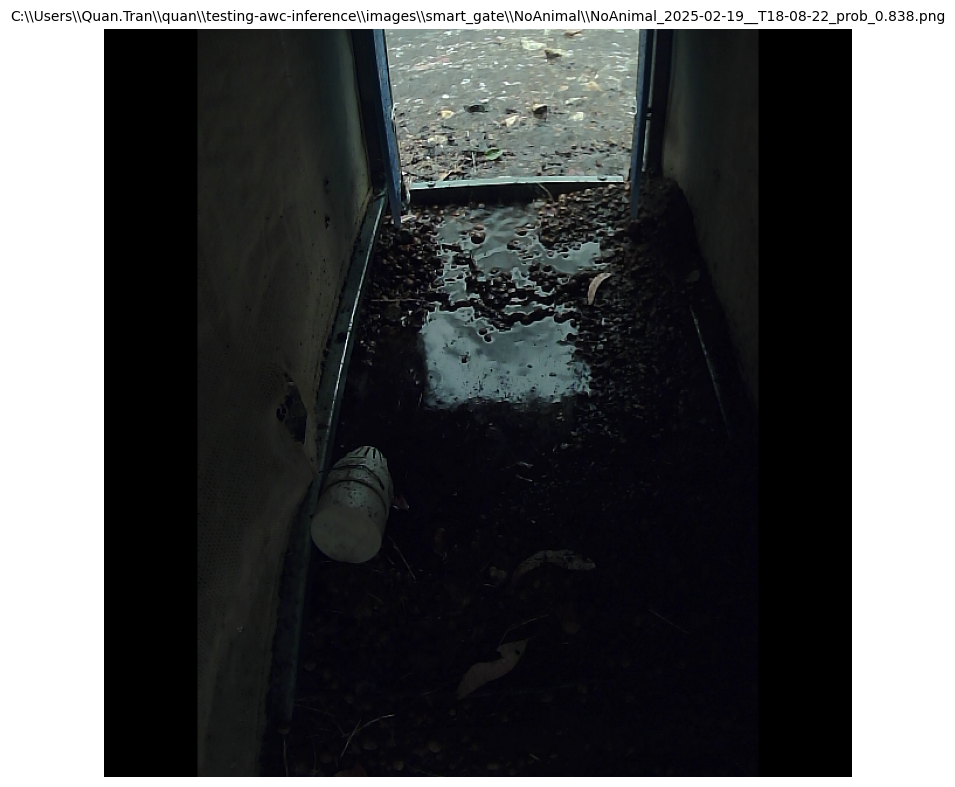

In [20]:
no_animal = r"C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\smart_gate\\NoAnimal\\NoAnimal_2025-02-19__T18-08-22_prob_0.838.png"
visualize_detections((no_animal,None,None))

In [21]:
pipeline.predict(no_animal)
# no results

[]

This is an image with an animal in low light setting, and only partly visual

In [22]:
blur_animal = r"C:\\Users\\Quan.Tran\\quan\\testing-awc-inference\\images\\smart_gate\\NoAnimal\\NoAnimal_2025-02-10__T20-06-34_prob_0.612.png"
results=pipeline.predict(blur_animal)
results

[('C:/Users/Quan.Tran/quan/testing-awc-inference/images/smart_gate/NoAnimal/NoAnimal_2025-02-10__T20-06-34_prob_0.612.png',
  0.802,
  (0.625, 0.0015, 0.1093, 0.1406),
  'Antechinus flavipes | Yellow-footed Antechinus',
  0.5057)]

Notice that the last number of the result (the classification confidence) is low: 0.5057, and the label is a Yellow-footed Antechinus. This is likely a curious Woylie

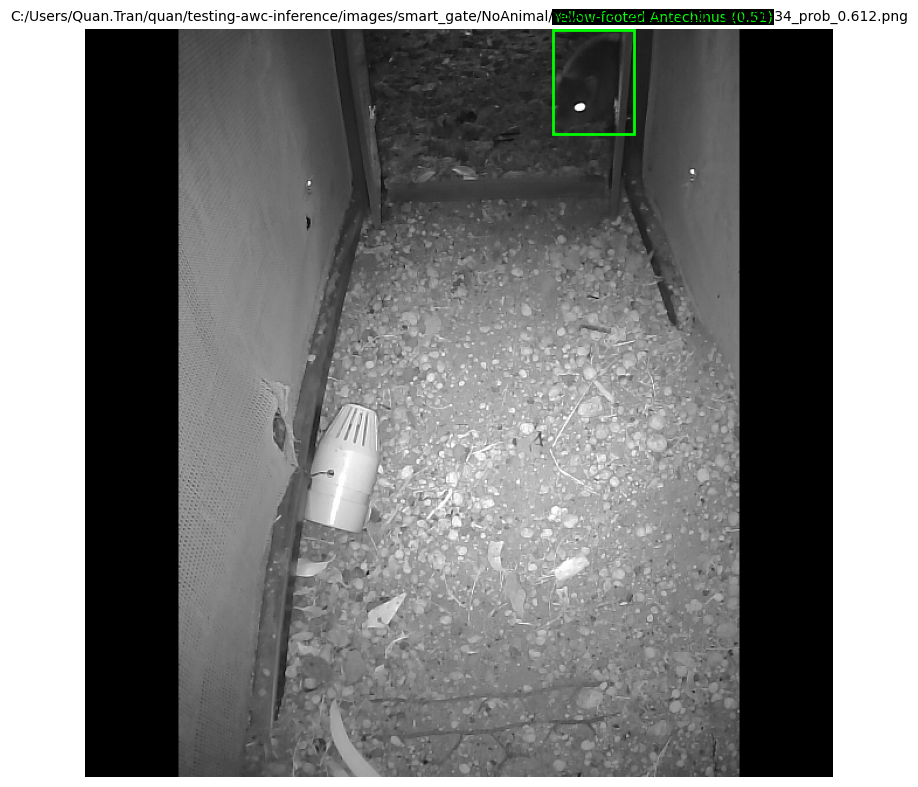

In [23]:
visualize_detections(results)

If you want to set a threshold to filter out low classification confidence (and low detection confidence as well), you will redefine your pipeline with the new threshold values (e.g. classification threshold is set as 0.6 in the following example)

In [29]:
pipeline = DetectAndClassify(detector_path = DETECTOR,
                             classifier_path = CLASSIFIER,
                             label_names=labels,
                             detection_threshold=0.1,
                             clas_threshold=0.6)

PyTorch reports 1 available CUDA devices
GPU available: True
Bypassing imports for model type yolov5
Loading PT detector with compatibility mode classic
Loaded image size 1280 from model metadata
Using model stride: 64
PTDetector using device cuda:0


Fusing layers... 
Fusing layers... 
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
	GPU Device: NVIDIA GeForce RTX 5070
	GPU Device: NVIDIA GeForce RTX 5070
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes


In [30]:
results=pipeline.predict(blur_animal)
results

[('C:/Users/Quan.Tran/quan/testing-awc-inference/images/smart_gate/NoAnimal/NoAnimal_2025-02-10__T20-06-34_prob_0.612.png',
  0.802,
  (0.625, 0.0015, 0.1093, 0.1406))]

No classification label and classification confidence returned here (since previously we know the confidence is aorund 0.507)

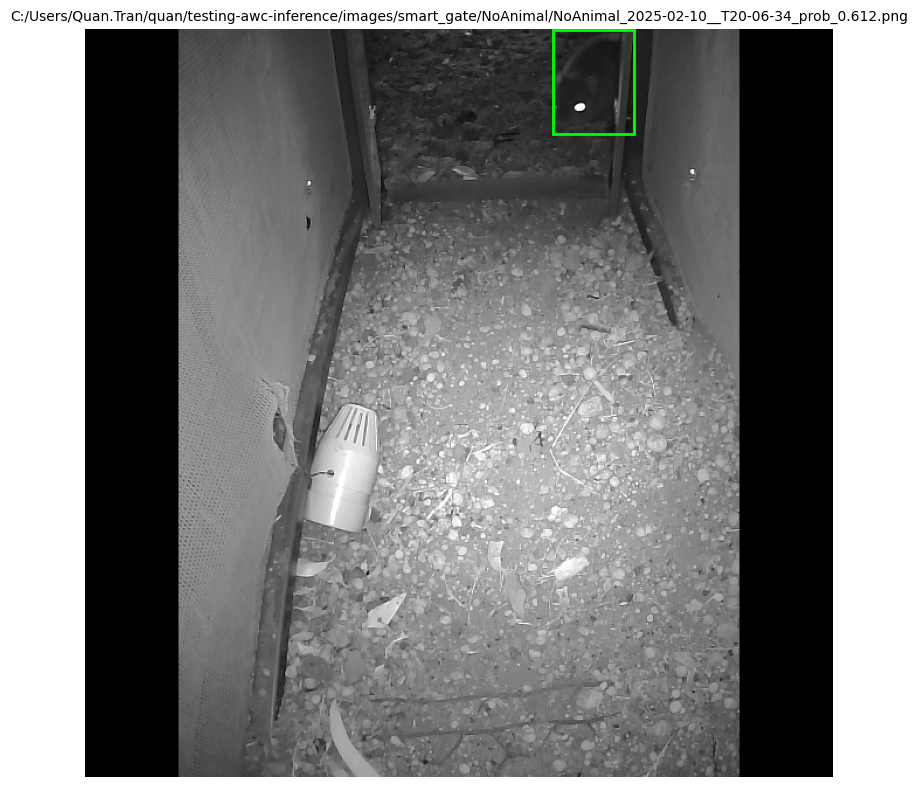

In [25]:
visualize_detections(results)

# Run your pipeline through the entire folder

In [31]:
pipeline = DetectAndClassify(
                             detector_path = DETECTOR,
                             classifier_path = CLASSIFIER,
                             label_names=labels,
                             detection_threshold=0.1,
                             clas_threshold=0.5)
                             

PyTorch reports 1 available CUDA devices
GPU available: True
Bypassing imports for model type yolov5
Loading PT detector with compatibility mode classic
Loaded image size 1280 from model metadata
Using model stride: 64
PTDetector using device cuda:0


Fusing layers... 
Fusing layers... 
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 575 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
	GPU Device: NVIDIA GeForce RTX 5070
	GPU Device: NVIDIA GeForce RTX 5070
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes
Loaded finetuned timm classification model: awc-135-v1.pth with 135 classes


In [32]:
img_paths = get_all_image_paths(r"C:\Users\Quan.Tran\quan\testing-awc-inference\images\Example Images of Species")

In [33]:
len(img_paths)

514

In [34]:
results = pipeline.predict(img_paths,
                           topn=2,
                           clas_bs=4,
                           show_progress=True
                          )

Classification: 100%|█████████████████████████████████████| 154/154 [00:18<00:00,  8.17batch/s]

Pipeline: 514 images, 616 detections in 62.05s (8.28 img/s)


In [35]:
# the first 5 results:
results[:5]

[('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater.JPG',
  0.968,
  (0.5444, 0.5833, 0.1606, 0.1458),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9831),
 ('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater2.JPG',
  0.974,
  (0.4809, 0.2747, 0.1508, 0.179),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9976),
 ('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
  0.914,
  (0.0195, 0.4986, 0.104, 0.1197),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater',
  0.9938),
 ('C:/Users/Quan.Tran/quan/testing-awc-inference/images/Example Images of Species/Acanthagenys rufogularis - Spiny-cheeked Honeyeater3.JPG',
  0.915,
  (0.2231, 0.5885, 0.0693, 0.1035),
  'Acanthagenys rufogularis | Spiny-cheeked Honeyeater'

If your GPU has more VRAM, increasing this (batch size) can speed up the classification step a bit (not the detection step)

In [36]:
results = pipeline.predict(img_paths,
                           topn=2,
                           clas_bs=32, 
                           show_progress=True
                          )

Classification: 100%|███████████████████████████████████████| 20/20 [00:13<00:00,  1.46batch/s]

Pipeline: 514 images, 616 detections in 54.42s (9.45 img/s)
